## Business Understanding


### Company Name: HealthCare Analytics Solutions (HAS)

### Project Objective
- HAS aims to develop a predictive model to assist healthcare providers in identifying patients at risk of sepsis. 
- Sepsis is a life-threatening condition that arises when the body's response to infection causes injury to its tissues and organs. 
- Early detection and prompt intervention are critical in reducing mortality rates associated with sepsis.

### Target Audience

- Healthcare Providers: Hospitals, clinics, and medical practitioners who are responsible for diagnosing and treating patients.
- Medical Researchers: Professionals involved in studying and improving sepsis detection and treatment protocols.
- Healthcare Administrators: Decision-makers within healthcare organizations interested in implementing predictive analytics solutions to improve patient outcomes and operational efficiency.

### Key Goals

1. Early Detection: Develop a machine learning model capable of predicting the likelihood of a patient developing sepsis based on their medical history and physiological parameters.
2. Reduced Mortality: Improve patient outcomes by enabling early intervention and timely treatment for individuals at risk of sepsis.
3. Resource Optimization: Assist healthcare providers in efficiently allocating resources, such as medical staff and equipment, to patients most in need, thereby optimizing patient care and reducing healthcare costs.
4. Research Advancement: Contribute to medical research by providing insights into the risk factors and predictive indicators associated with sepsis development, leading to advancements in sepsis diagnosis and treatment protocols.

### Data Description

- The dataset contains various medical parameters and demographic information for a group of patients, including pregnancy status, glucose levels, blood pressure, skin thickness, insulin levels, body mass index (BMI), age, and insurance status.
- Each patient record is labeled with the presence or absence of sepsis (positive or negative).

### Analytical Questions
1. What are the demographic characteristics of the patients in the dataset?
2. What are the distributions of medical parameters such as glucose levels, blood pressure, BMI, etc.?
3. Is there any correlation between these medical parameters and the target variable (sepsis)?
4. Are there any notable differences in medical parameters between patients with and without sepsis?
5. How does the distribution of patients' insurance status look like, and is there any association with the likelihood of sepsis?

### Hypotheses

- Null Hypothesis (H0): Patients with advanced age, lower socioeconomic status (as indicated by insurance status), and certain medical conditions are not at a higher risk of developing sepsis.

- Alternative Hypothesis (H1): Patients with advanced age, lower socioeconomic status (as indicated by insurance status), and certain medical conditions are at a higher risk of developing sepsis.

### Explanation
- The null hypothesis assumes that there is no relationship between demographic factors (age, socioeconomic status) and medical conditions with the risk of developing sepsis.

- The alternative hypothesis suggests that there is a significant association between demographic factors (advanced age, lower socioeconomic status) and certain medical conditions with a higher risk of developing sepsis.

# Import necessary libraries

In [67]:
# Data Handling
import pandas as pd  # For data manipulation and analysis using DataFrames
import numpy as np  # For numerical operations and arrays
import warnings  # To handle warnings in a way that they can be ignored
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import joblib # Import joblib for model serialization
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import os


In [2]:


# Read the training data from "Paitients_Files_Train.csv" into a DataFrame
train_data = "C:\\Users\\Desktop\\Project Career Accelerator\\LP5_Machine Learning API using FastAPI\\Machine-Learning-API-using-FastAPI\\Data\\Paitients_Files_Train.csv"

# Read the training data from the CSV file into a DataFrame
train_data = pd.read_csv(train_data)

# Display the first few rows of the training data

print(train_data.head())


          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive


In [3]:


# Read the training data from "Paitients_Files_Test.csv" into a DataFrame
test_data = "C:\\Users\\Desktop\\Project Career Accelerator\\LP5_Machine Learning API using FastAPI\\Machine-Learning-API-using-FastAPI\\Data\\Paitients_Files_Test.csv"

# Read the test data from the CSV file into a DataFrame
test_data = pd.read_csv(test_data)

# Display the first few rows of the test data

print(test_data.head())


          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0


### Exploratory Data Analysis (EDA) on Training Data

#### Features Present in the Dataset

The features present in the dataset are as follows:

1. ID
2. PRG (Pregnancies)
3. PL (Plasma glucose concentration)
4. PR (Diastolic blood pressure)
5. SK (Triceps skin fold thickness)
6. TS (2-Hour serum insulin)
7. M11 (Body mass index)
8. BD2 (Diabetes pedigree function)
9. Age
10. Insurance
11. Sepssis (Target variable)

In [4]:
# Data Summary

train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


#### Data Types of Features

The data types of these features are as follows:

1. ID, Sepssis: Object
2. PRG, PL, PR, SK, TS, Age, Insurance: Integer
3. M11, BD2: Float


In [5]:
# Summary statistics for numerical features

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [6]:
# Check for missing values
train_data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

### Distribution Analysis

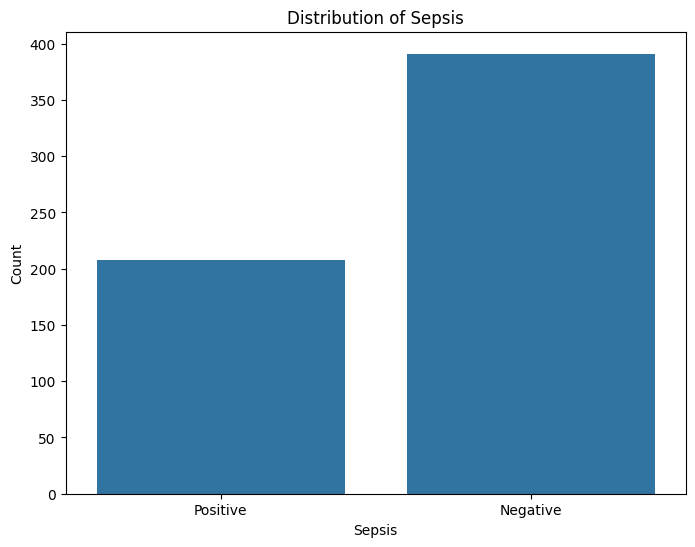

In [7]:
# Visualize the distribution of the target variable (sepsis)
plt.figure(figsize=(8, 6))
sns.countplot(x='Sepssis', data=train_data)
plt.title('Distribution of Sepsis')
plt.xlabel('Sepsis')
plt.ylabel('Count')
plt.show()

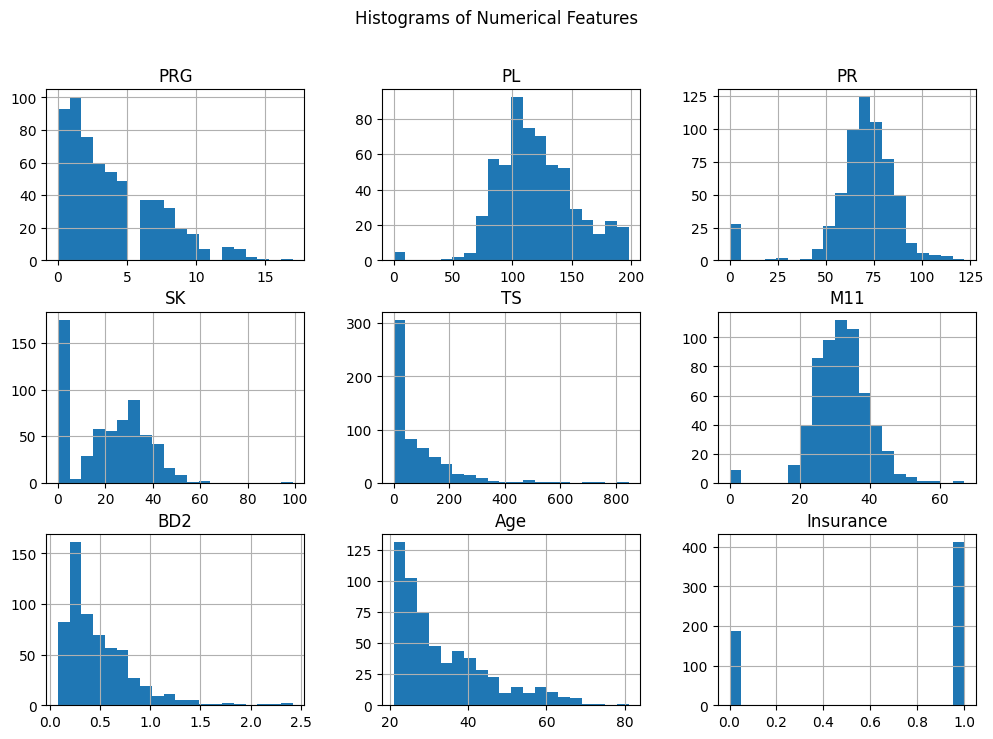

In [8]:
# Explore the distributions of numerical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numerical_features].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

<Figure size 1200x800 with 0 Axes>

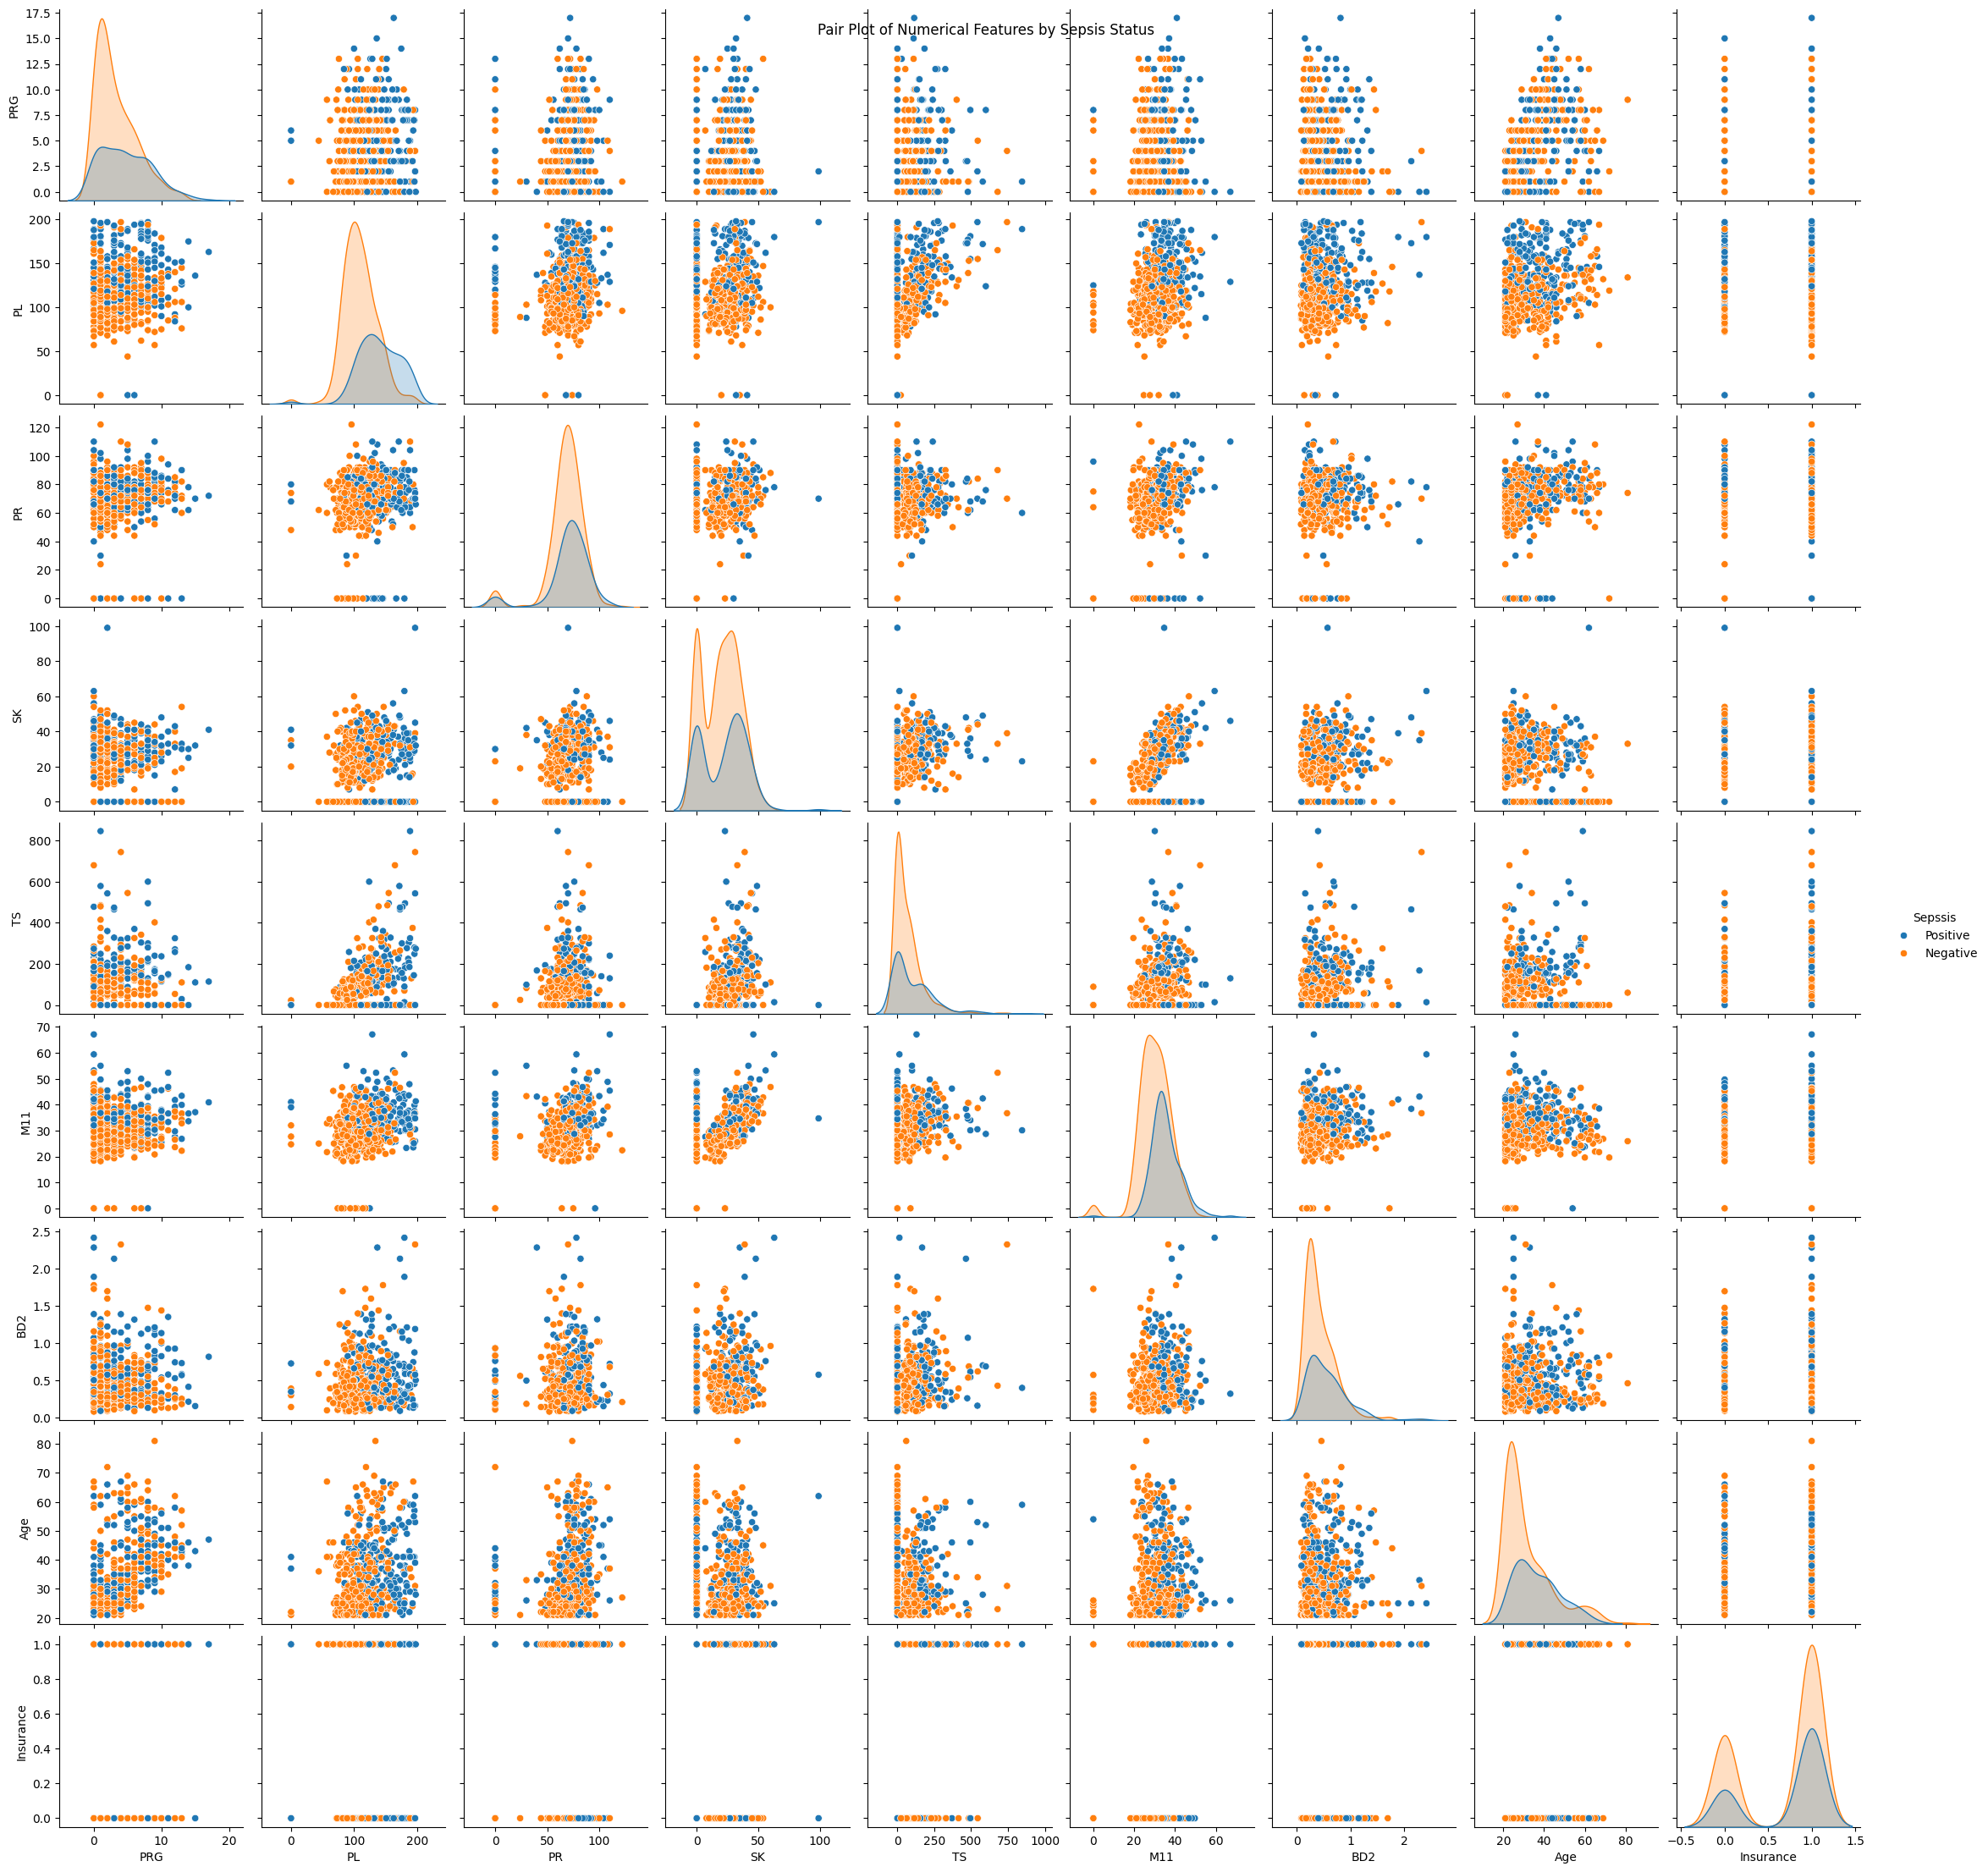

In [9]:
# Explore relationships between numerical features and the target variable
plt.figure(figsize=(12, 8))
sns.pairplot(train_data, hue='Sepssis')
plt.suptitle('Pair Plot of Numerical Features by Sepsis Status')
plt.show()

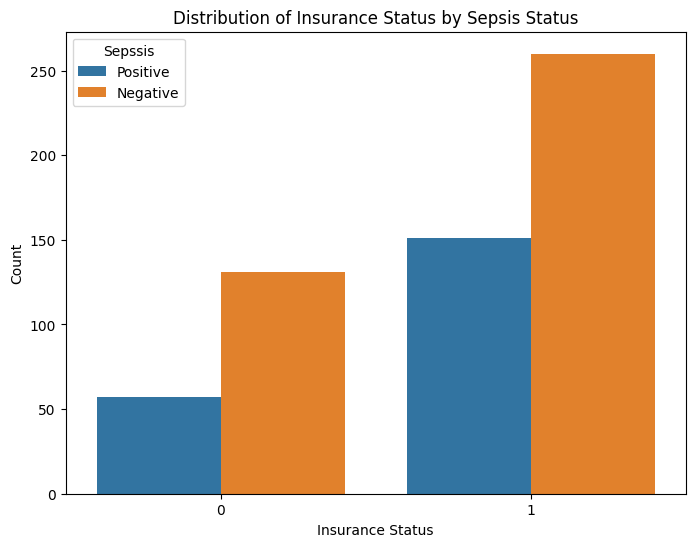

In [10]:
# Analyze the distribution of insurance status and its association with sepsis
plt.figure(figsize=(8, 6))
sns.countplot(x='Insurance', hue='Sepssis', data=train_data)
plt.title('Distribution of Insurance Status by Sepsis Status')
plt.xlabel('Insurance Status')
plt.ylabel('Count')
plt.show()

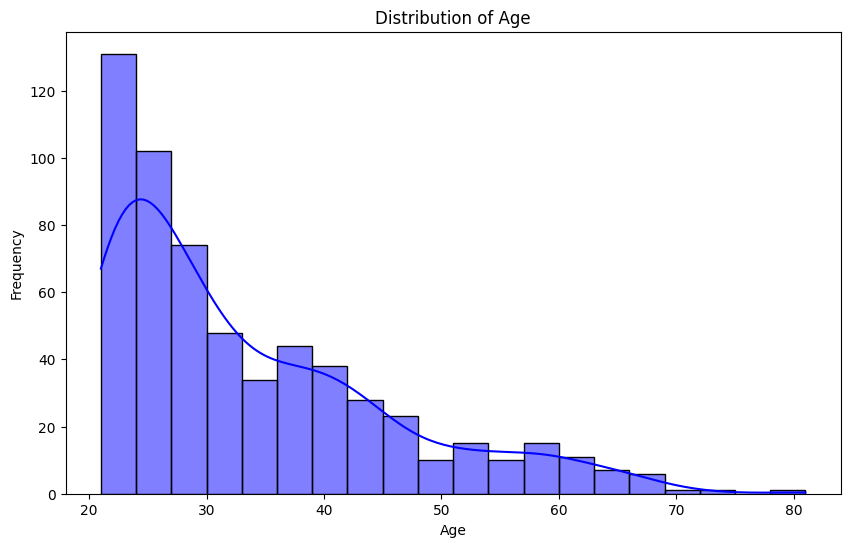

In [11]:
# Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Drop non-numeric columns before calling describe()
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numeric_columns].describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


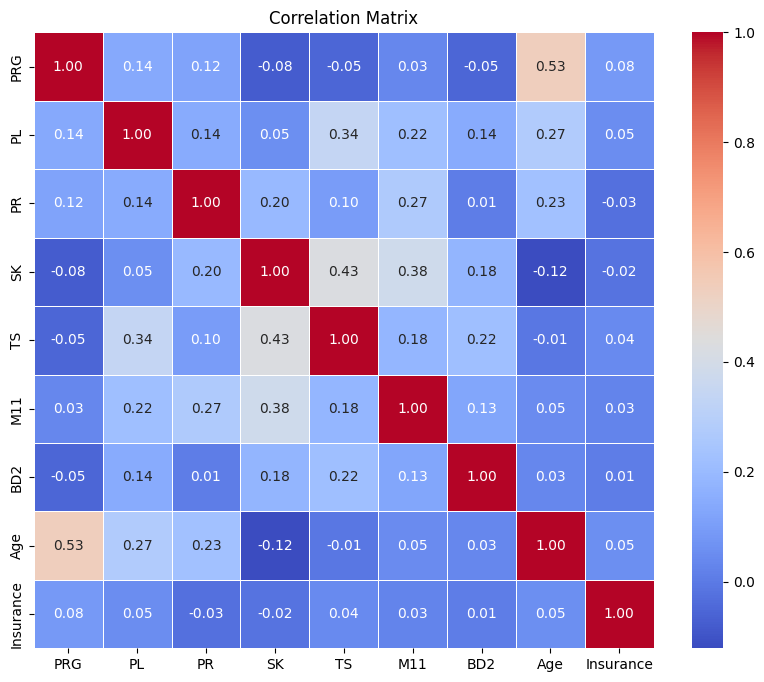

In [13]:
# Drop non-numeric columns before creating correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


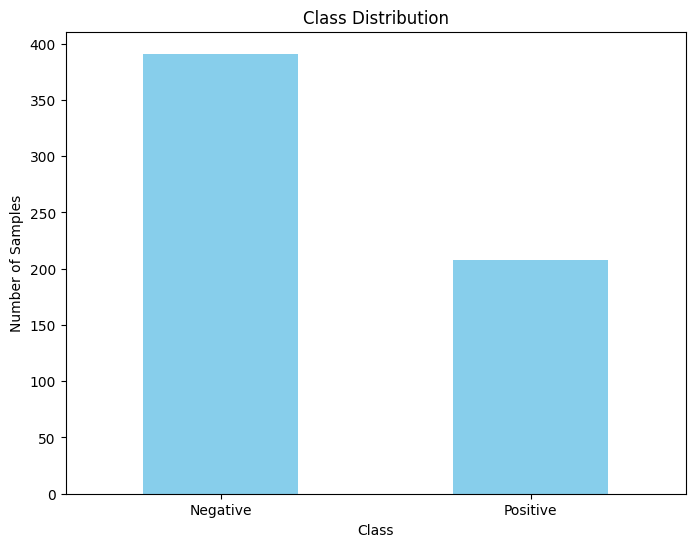

Class Counts:
Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

Class Percentages:
Sepssis
Negative    65.275459
Positive    34.724541
Name: count, dtype: float64


In [14]:
# Compute class counts
class_counts = train_data['Sepssis'].value_counts()

# Calculate class percentages
class_percentages = class_counts / len(train_data) * 100

# Visualize class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

# Print class counts and percentages
print("Class Counts:")
print(class_counts)
print("\nClass Percentages:")
print(class_percentages)

### Analytical Questions
1. What are the demographic characteristics of the patients in the dataset?
2. What are the distributions of medical parameters such as glucose levels, blood pressure, BMI, etc.?
3. Is there any correlation between these medical parameters and the target variable (sepsis)?
4. Are there any notable differences in medical parameters between patients with and without sepsis?
5. How does the distribution of patients' insurance status look like, and is there any association with the likelihood of sepsis?

In [15]:
# 1. Demographic Characteristics

print(train_data[['Age', 'Insurance']].describe())

              Age   Insurance
count  599.000000  599.000000
mean    33.290484    0.686144
std     11.828446    0.464447
min     21.000000    0.000000
25%     24.000000    0.000000
50%     29.000000    1.000000
75%     40.000000    1.000000
max     81.000000    1.000000


- Age: The mean age of patients in the dataset is approximately 33.29 years, with a standard deviation of around 11.83 years. 

- The age distribution ranges from 21 to 81 years, with 25% of patients aged below 24, 50% below 29, and 75% below 40.

- Insurance: Around 68.61% of patients have insurance coverage, while approximately 31.39% do not.


2. Distributions of Medical Parameters:


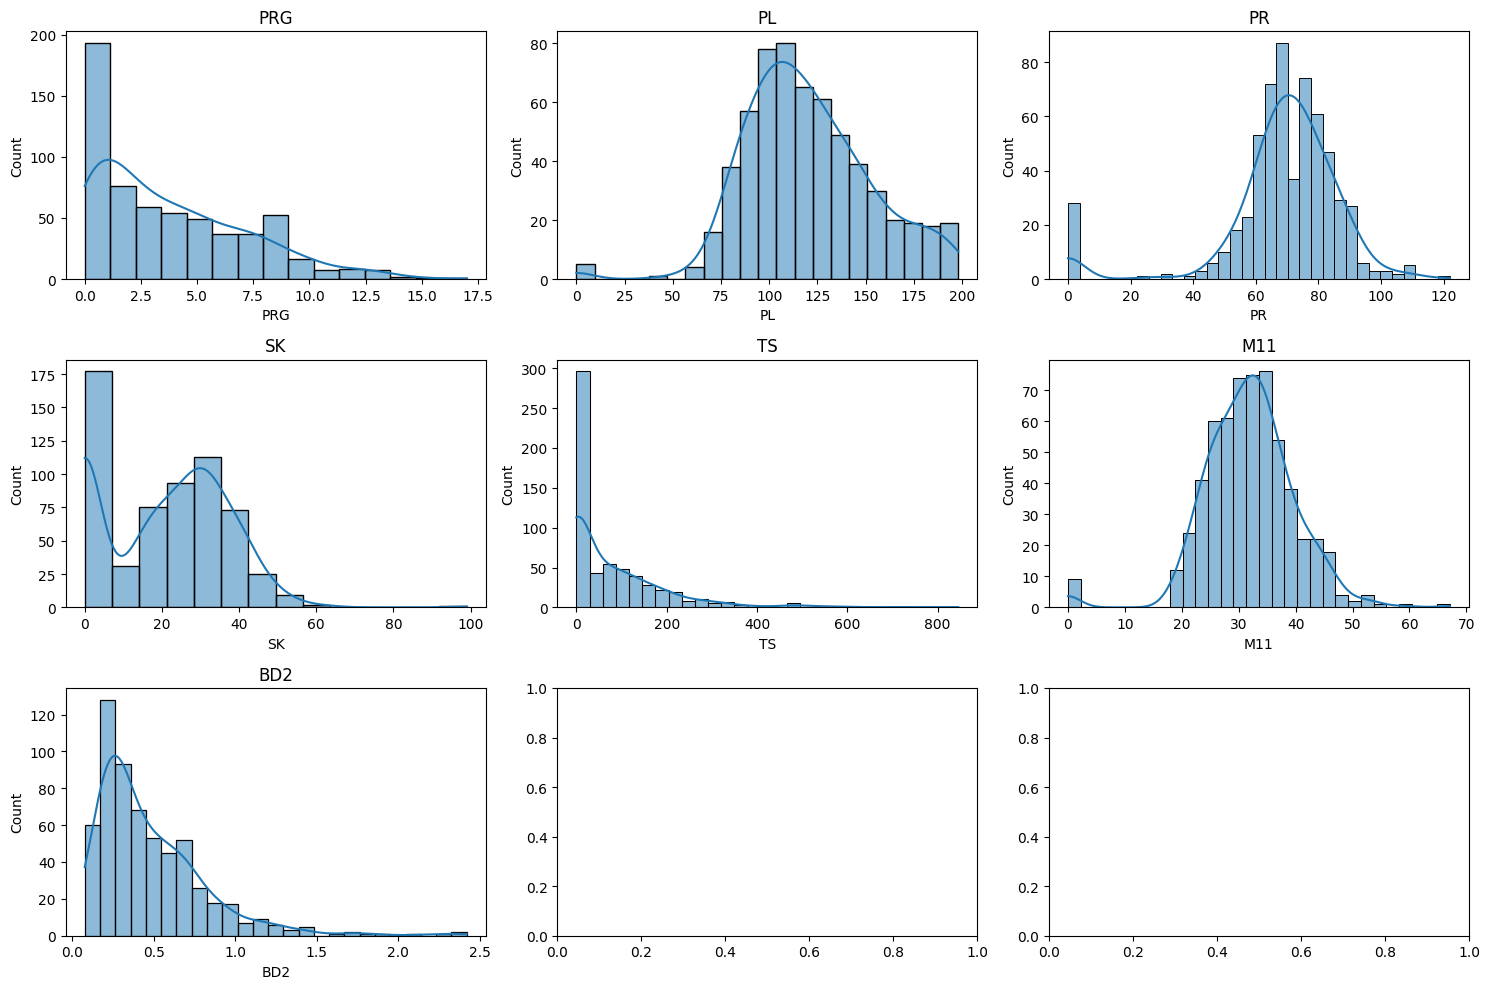

In [16]:
# 2. Distributions of Medical Parameters
print("\n2. Distributions of Medical Parameters:")
medical_parameters = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, parameter in enumerate(medical_parameters):
    row = i // 3
    col = i % 3
    sns.histplot(train_data[parameter], kde=True, ax=axes[row, col])
    axes[row, col].set_title(parameter)
plt.tight_layout()
plt.show()


4. Differences in Medical Parameters:


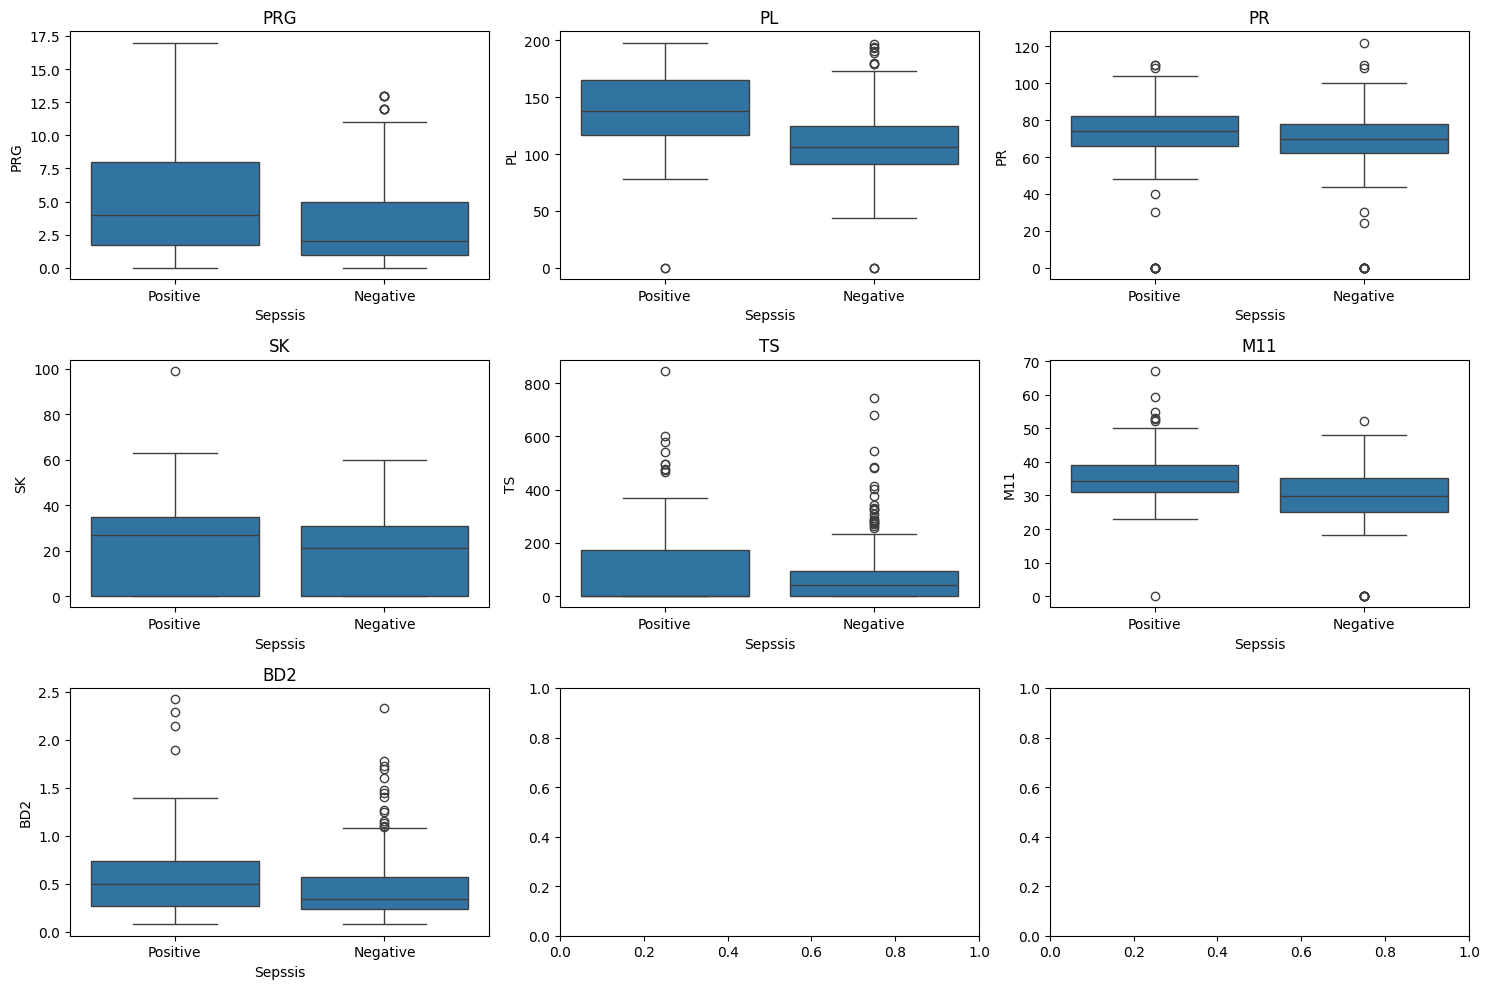

In [17]:
# 4. Differences in Medical Parameters
print("\n4. Differences in Medical Parameters:")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, parameter in enumerate(medical_parameters):
    row = i // 3
    col = i % 3
    sns.boxplot(x='Sepssis', y=parameter, data=train_data, ax=axes[row, col])
    axes[row, col].set_title(parameter)
plt.tight_layout()
plt.show()


5. Insurance Status and Likelihood of Sepsis:


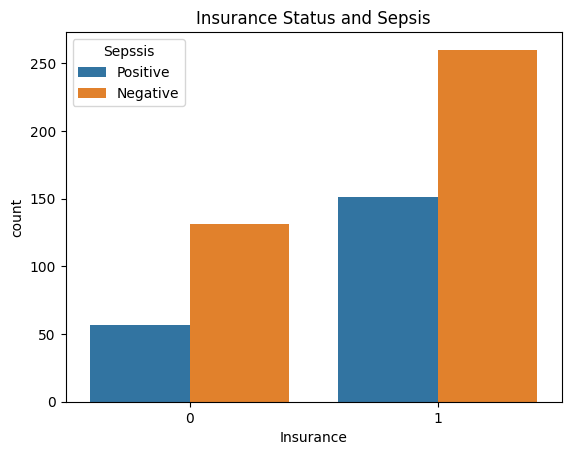

In [18]:
# 5. Insurance Status and Likelihood of Sepsis
print("\n5. Insurance Status and Likelihood of Sepsis:")
sns.countplot(x='Insurance', hue='Sepssis', data=train_data)
plt.title('Insurance Status and Sepsis')
plt.show()

 ### Hypothesis Testing

### Hypotheses

- Null Hypothesis (H0): Patients with advanced age, lower socioeconomic status (as indicated by insurance status), and certain medical conditions are not at a higher risk of developing sepsis.

- Alternative Hypothesis (H1): Patients with advanced age, lower socioeconomic status (as indicated by insurance status), and certain medical conditions are at a higher risk of developing sepsis.

### Explanation
- The null hypothesis assumes that there is no relationship between demographic factors (age, socioeconomic status) and medical conditions with the risk of developing sepsis.

- The alternative hypothesis suggests that there is a significant association between demographic factors (advanced age, lower socioeconomic status) and certain medical conditions with a higher risk of developing sepsis.

In [19]:
# Hypothesis 1: Testing association between age and sepsis
sepsis_age_positive = train_data[train_data['Sepssis'] == 'Positive']['Age']
sepsis_age_negative = train_data[train_data['Sepssis'] == 'Negative']['Age']

t_stat, p_value = ttest_ind(sepsis_age_positive, sepsis_age_negative)
print("Hypothesis 1 - Age and Sepsis:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Hypothesis 2: Testing association between insurance status and sepsis
insurance_sepsis_cross_tab = pd.crosstab(train_data['Insurance'], train_data['Sepssis'])
chi2, p_value, _, _ = chi2_contingency(insurance_sepsis_cross_tab)
print("\nHypothesis 2 - Insurance Status and Sepsis:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value)


Hypothesis 1 - Age and Sepsis:
t-statistic: 5.254202967191448
p-value: 2.0718778891881853e-07

Hypothesis 2 - Insurance Status and Sepsis:
Chi-square statistic: 2.0712782081677066
p-value: 0.1500956791860619


#### Insights 

Hypothesis 1 - Age and Sepsis:

The t-statistic is 5.254, which indicates a significant difference in the mean age between patients with and without sepsis.
The p-value is approximately 2.07e-07, which is much smaller than the significance level (e.g., α = 0.05). Therefore, we reject the null hypothesis and conclude that there is a significant association between age and the likelihood of developing sepsis. Specifically, patients with sepsis tend to be of older age compared to those without sepsis.
Hypothesis 2 - Insurance Status and Sepsis:

The chi-square statistic is 2.071, which is relatively small.
The p-value is approximately 0.150, which is greater than the significance level (α = 0.05). Therefore, we fail to reject the null hypothesis. There is insufficient evidence to conclude that there is a significant association between insurance status and the likelihood of developing sepsis based on the data provided.

- Age appears to be a significant factor associated with the risk of sepsis, with older patients being more likely to develop sepsis.
- However, there's no significant evidence to suggest that insurance status is associated with the likelihood of developing sepsis in this dataset.

 ## Data Preprocessing

- Handle missing values: Impute or drop missing values.
- Split the data into features (X) and the target variable (y).

###  Handle missing values

In [20]:
# Check for missing values in the training data
missing_values_train = train_data.isnull().sum()
missing_values_train

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [21]:
# Check for missing values in the test data
missing_values_test = test_data.isnull().sum()
missing_values_test

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

- Both dataset doesn't have any missing values

In [22]:
# Separate features and target variable for both training and test data

# Features for training
X= train_data.drop(columns=['ID', 'Sepssis']) 
 
# Target variable for training
y = train_data['Sepssis']  

# Features for testing
X_test = test_data.drop(columns=['ID'])  

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Create preprocessor

In [24]:

# Define numerical and categorical features
numeric_features = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
categorical_features = ['Insurance']

# Create preprocessing pipelines for numerical and categorical data
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by replacing them with the mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values by replacing them with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])

# Create a preprocessor to handle both numerical and categorical features
preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_features),
    ('categorical', categorical_pipeline, categorical_features)
])

# Fit and transform the training data using the preprocessor
X_train_processed = preprocessor.fit_transform(train_data)

# Transform the test data using the preprocessor
X_test_processed = preprocessor.transform(test_data)


In [25]:
# Define pipelines for each model
pipelines = {
    'RandomForest': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]),
    'LogisticRegression': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'SVM': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ])
}

In [26]:
# Train and evaluate each model
results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy:", accuracy)

RandomForest Accuracy: 0.7
LogisticRegression Accuracy: 0.7416666666666667
SVM Accuracy: 0.7333333333333333


### Model Selection  with the highest average cross-validation score

In [27]:
# Find the best model
best_model_name = max(results, key=results.get)
best_model = pipelines[best_model_name]

In [28]:
# Persist the best model
joblib.dump(best_model, 'best_model.joblib')

print("Best model:", best_model_name)

Best model: LogisticRegression


### Model Selection using the highest average accuracy score

In [29]:
# Define candidate models
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC()
}

# Perform cross-validation and select the best model
best_model = None
best_score = 0
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
    avg_score = scores.mean()
    if avg_score > best_score:
        best_score = avg_score
        best_model = model

print("Best Model:", best_model)
print("Best Model Average Cross-Validation Score:", best_score)

Best Model: RandomForestClassifier()
Best Model Average Cross-Validation Score: 0.7744956140350877


In [34]:
# Instantiate the models
model_rf = RandomForestClassifier()
model_lr = LogisticRegression()
model_svm = SVC()

# Train each model using the training data
model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)
model_svm.fit(X_train, y_train)

SVC()

## Model Evaluation

In [35]:

# Evaluate RandomForestClassifier
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Evaluate LogisticRegression
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Evaluate SVC
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)


Random Forest Classifier Accuracy: 0.7416666666666667
Logistic Regression Accuracy: 0.775
Support Vector Machine Accuracy: 0.725


In [36]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.725


In [52]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on y_train and transform both y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert predicted labels from string format to numerical format
y_pred_rf_encoded = label_encoder.transform(y_pred_rf)
y_pred_lr_encoded = label_encoder.transform(y_pred_lr)
y_pred_svm_encoded = label_encoder.transform(y_pred_svm)


In [65]:
# Define a function to compute evaluation metrics for a given model
def compute_metrics(y_true, y_pred):
    
    # Compute precision, recall, F1-score, and AUC-ROC
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred)
    
    return precision, recall, f1, auc_roc

# Compute metrics for Random Forest Classifier
precision_rf, recall_rf, f1_rf, auc_roc_rf = compute_metrics(y_test_encoded, y_pred_rf_encoded)
print("Random Forest Classifier:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("AUC-ROC:", auc_roc_rf)
print()

# Compute metrics for Logistic Regression
precision_lr, recall_lr, f1_lr, auc_roc_lr = compute_metrics(y_test_encoded, y_pred_lr_encoded)
print("Logistic Regression:")
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
print("AUC-ROC:", auc_roc_lr)
print()

# Compute metrics for Support Vector Machine
precision_svm, recall_svm, f1_svm, auc_roc_svm = compute_metrics(y_test_encoded, y_pred_svm_encoded)
print("Support Vector Machine:")
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)
print("AUC-ROC:", auc_roc_svm)


Random Forest Classifier:
Precision: 0.6428571428571429
Recall: 0.627906976744186
F1-score: 0.6352941176470588
AUC-ROC: 0.7165508909694958

Logistic Regression:
Precision: 0.7
Recall: 0.6511627906976745
F1-score: 0.674698795180723
AUC-ROC: 0.7476593174267593

Support Vector Machine:
Precision: 0.631578947368421
Recall: 0.5581395348837209
F1-score: 0.5925925925925927
AUC-ROC: 0.6881606765327696


### Insights


- Precision: Logistic Regression achieved the highest precision at 0.7000, followed closely by the Random Forest Classifier at 0.6429. SVM had the lowest precision at 0.6316.

- Recall: Logistic Regression also had the highest recall at 0.6512, followed by the Random Forest Classifier at 0.6279. SVM had the lowest recall at 0.5581.

- F1-score: Logistic Regression had the highest F1-score at 0.6747, indicating a good balance between precision and recall. The Random Forest Classifier and SVM had F1-scores of 0.6353 and 0.5926, respectively.

- AUC-ROC: Logistic Regression had the highest AUC-ROC at 0.7477, indicating good overall performance in distinguishing between positive and negative instances. The Random Forest Classifier and SVM had AUC-ROC values of 0.7166 and 0.6882, respectively.


- Logistic Regression is the best-performing model in terms of precision, recall, F1-score, and AUC-ROC.

In [68]:
# Create a folder to store the models
folder_path = 'models'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save Random Forest Classifier
joblib.dump(model_rf, os.path.join(folder_path, 'random_forest_model.joblib'))

# Save Logistic Regression
joblib.dump(model_lr, os.path.join(folder_path, 'logistic_regression_model.joblib'))

# Save Support Vector Machine
joblib.dump(model_svm, os.path.join(folder_path, 'support_vector_machine_model.joblib'))


['models\\support_vector_machine_model.joblib']